# Quantum Circuit Plotting with SymPy
Rick Muller, rpmuller@gmail.com

Explore what can and cannot be done using existing sympy circuit plotting. The initial aim will be to support everything that is on the [qasm2circ website](http://www.media.mit.edu/quanta/qasm2circ/). When you see a heading listing an example number, it will refer to the example circuit on that page.

Note: The examples on this page will require *at least* the [development (i.e. github) branch of sympy](http://github.com/sympy/sympy), and may require work in my current branch (which changes from week to week). If you'd like to play with newer features, and the examples on this page aren't working for you, email me (rpmuller@gmail.com) and I can send you instructions for how to get these to work.

In [1]:
from sympy import *
from sympy.physics.quantum.circuitplot import CircuitPlot,labeller,Mz,CreateOneQubitGate
from sympy.physics.quantum.gate import *
from sympy.physics.quantum.qasm import Qasm

## Rough priorities of tasks
* Stack multiple gates vertically
* Block multiqubit gate
* Latex matrices as gates
* Do circuits resize correctly?

## Qasm tests status
1. Works
2. Works
3. Works
4. Works
5. Can't plot matrices as operators
6. Works
7. Works
8. Works
9. Works
10. Multi-qubit blocks + classical lines
11. Multi-qubit blocks
12. Multi-qubit blocks
13. Multi-qubit blocks (kinda works if you convert defbox->def by hand)
14. Multi-qubit blocks 
15. D-shaped measurement
16. D-shaped measurement + slash gate + vertical line gates
17. D-shaped measurement

## X gate test

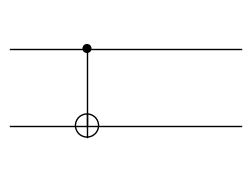

In [2]:
CircuitPlot(CNOT(1,0),2)

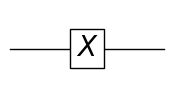

In [3]:
CircuitPlot(X(0),1)

Sympy now prints a normal X gate when it's a one-qubit gate, but the circ+ when it's a CNOT!

## Z gate test


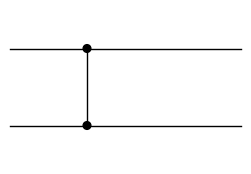

In [4]:
CircuitPlot(CPHASE(1,0),2)

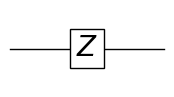

In [5]:
CircuitPlot(Z(0),1)

## Making arbitrary gates:

It's pretty easy to overload single-qubit operators, and you can even specify fairly complicated LaTeX:

In [6]:
VGate = CreateOneQubitGate('V')
SqrtX = CreateOneQubitGate('sqrt-X','\sqrt{X}')

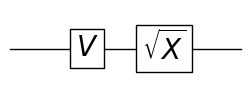

In [7]:
CircuitPlot(SqrtX(0)*VGate(0),1)

You can even make these controlled:

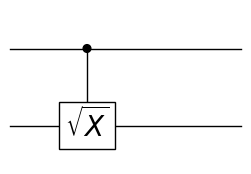

In [8]:
CircuitPlot(CGate(1,SqrtX(0)),2)

Unfortunately, there isn't a general way to make a block multi-qubit gate. You need to overload the plot_gate function, which I haven't. And, I guess you also have to make sure that all of the qubits are contiguous.

**Todo** Create multi-qubit gate.

In [9]:
class SqrtSWAP(TwoQubitGate):
    gate_name = 'sqrt-SWAP'
    gate_name_latex = u'\sqrt{SWAP}'

In [10]:
# This doesn't work:
# CircuitPlot(SqrtSWAP(0,1),2)

## Example 1: EPR Creation

Goal:

<img src="http://www.media.mit.edu/quanta/qasm2circ/test1.png" width="200" />

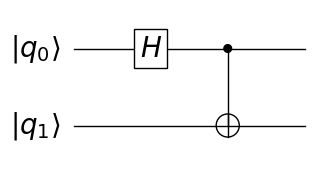

In [10]:
CircuitPlot(CNOT(1,0)*H(1),2,labels=labeller(2))

A couple of notes:

* The top wire in a figure is the nth qubit in the circuit, not the 0-th or 1st.
* The gates in a circuit are ordered left to right. In other words, the first gate to be applied is the left-most gate in the circuit.

Both of these make perfect sense from a physics point of view, but they may not be what you expect.

## qasm version:

Function zz not defined. Skipping


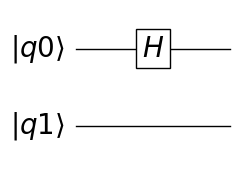

In [21]:
q = Qasm('qubit q0','qubit q1','h q0','zz q0,q1')
q.plot()
# crz(pi/2) q[1],q[0];

Works, but note that I haven't implemented the subscripts in qasm parser yet. It's not hard to rewrite the labelling so that it sticks an underscore between the alphabetical characters and the numbers, but I don't want to limit the way the code works based on assumptions of use cases that I haven't fully thought through. In the meantime, if you stick underscores in the label names, these will work:

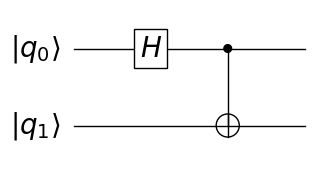

In [16]:
q = Qasm('qubit q_0','qubit q_1','h q_0','cnot q_0,q_1')
q.plot()

You can also call the commands directly:

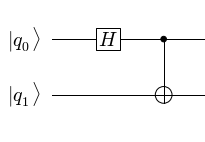

In [14]:
q = Qasm()
q.qubit('q_0')
q.qubit('q_1')
q.h('q_0')
q.cnot('q_0','q_1')
q.plot()

## Example 2: Teleportation Gate

Goal:

<img src="http://www.media.mit.edu/quanta/qasm2circ/test2.png" width="400" />

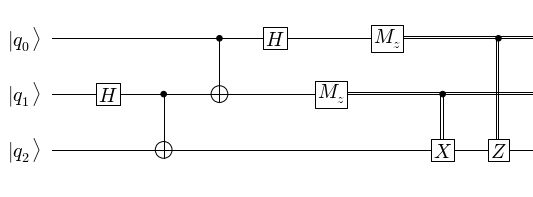

In [15]:
circuit = CGate(2,Z(0))*CGate(1,X(0))*Mz(2)*Mz(1)*H(2)*CNOT(2,1)*CNOT(1,0)*H(1)
cp = CircuitPlot(circuit,3,labels=labeller(3))

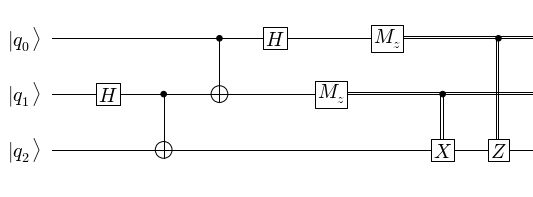

In [16]:
# qasm version
q = Qasm('qubit q_0','qubit q_1','qubit q_2','h  q_1',
         'cnot q_1,q_2','cnot q_0,q_1','h q_0',
         'measure q_1','measure q_0',
         'c-x q_1,q_2','c-z q_0,q_2')
q.plot()

## Example 3: Swap Gate

Goal:

<img src="http://www.media.mit.edu/quanta/qasm2circ/test3.png" width="200" />

In [37]:
from sympy.physics.quantum.gate import CGate

from sympy import Symbol, sin, cos, I, ImmutableMatrix
from sympy.physics.quantum import qapply
from sympy.physics.quantum.qubit import Qubit
from sympy.physics.quantum.gate import UGate

theta = Symbol('theta')

Ry_mat = ImmutableMatrix([[cos(theta/2), -sin(theta/2)],
                        [sin(theta/2),cos(theta/2)]])
Rx_mat = ImmutableMatrix([[cos(theta/2), -I*sin(theta/2)],
                        [-I*sin(theta/2) ,cos(theta/2)]])

Ry = UGate((0,), Ry_mat)
Rx= UGate((1,), Rx_mat)
c = Ry* Ry

print(qapply(c*Qubit('00'))) # -sin(theta/2)**2*|00> + 2*sin(theta/2)*cos(theta/2)*|01> + cos(theta/2)**2*|00>


-sin(theta/2)**2*|00> + 2*sin(theta/2)*cos(theta/2)*|01> + cos(theta/2)**2*|00>


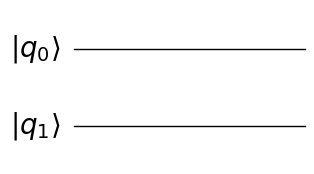

In [40]:
CircuitPlot(qapply(c*Ry), 2,labels=labeller(2))
# CircuitPlot(SWAP(0,2)*H(0)* CGate((0,),S(1)) *H(1)*CGate((0,),T(2))*CGate((1,),S(2))*H(2),3,labels=labeller(3,'j'))

#### qasm version:

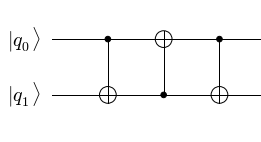

In [18]:
q = Qasm('qubit q_0','qubit q_1','cnot q_0,q_1','cnot q_1,q_0','cnot q_0,q_1')
q.plot()

## Example 4: QFT on 3 Qubits
Goal:

<img src="http://www.media.mit.edu/quanta/qasm2circ/test4.png" width="300"/>

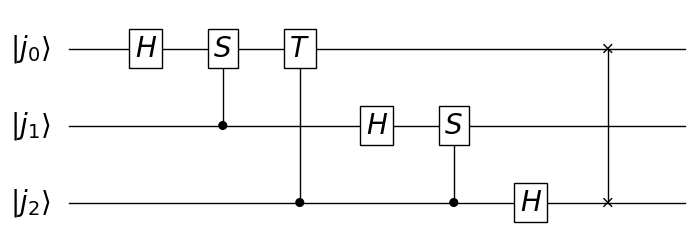

In [34]:
CircuitPlot(SWAP(0,2)*H(0)* CGate((0,),S(1)) *H(1)*CGate((0,),T(2))*CGate((1,),S(2))*H(2),3,labels=labeller(3,'j'))

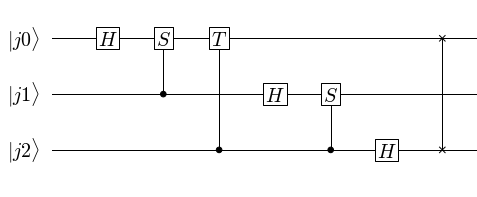

In [20]:
# qasm version:
q = Qasm("def	c-S,1,'S'",
        "def	c-T,1,'T'",
        "qubit	j0",
        "qubit	j1",
        "qubit	j2",
        "h	j0",
        "c-S	j1,j0",
        "c-T	j2,j0",
        "nop	j1",
        "h	j1",
        "c-S	j2,j1",
        "h	j2",
        "swap	j0,j2")
q.plot()

## Example 5
Goal:

<img src="http://www.media.mit.edu/quanta/qasm2circ/test5.png" width="300" />

In [21]:
# Note: you currently have to escape (double backslash) the \b and \t, 
# I guess b/c they're whitespace shortcuts
class Rot1(OneQubitGate):
    gate_name = 'Rot'
    gate_name_latex = r'\begin{array}{ll}\cos\theta&-\sin\theta\end{array}'

In [22]:
# This doesn't work:
#CircuitPlot(Rot1(0),1)

## Example 6
Goal:

<img src="http://www.media.mit.edu/quanta/qasm2circ/test6.png" width="200" />

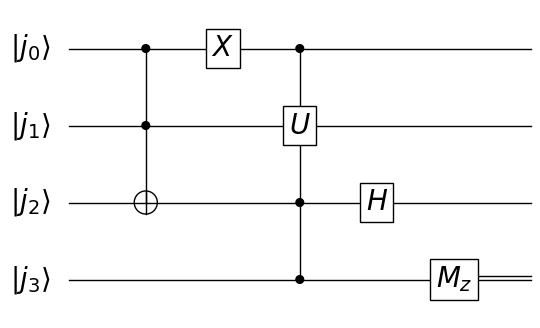

In [44]:
U = CreateOneQubitGate('U')
CircuitPlot(Mz(0)*H(1)*CGate((0,1,3),U(2))*X(3)*CGateS((2,3),X(1)),4,labels=labeller(4,'j'))

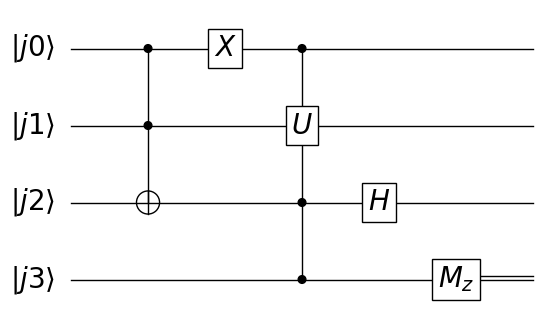

In [45]:
# Qasm version:
q = Qasm("def	c-U,3,'U'",
    "qubit	j0",
    "qubit	j1",
	"qubit	j2",
    "qubit	j3",
    "toffoli	j0,j1,j2",
    "X	j0",
    "c-U	j2,j3,j0,j1",
    "H	j2",
    "measure	j3")
q.plot()

## Example 7
Goal:

<img src="http://www.media.mit.edu/quanta/qasm2circ/test7.png" width="400" />

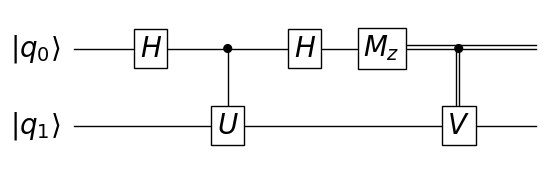

In [49]:
V = CreateOneQubitGate('V')

CircuitPlot(CGate(1,V(0))*Mz(1)*H(1)*CGate(1,U(0))*H(1),2,labels=labeller(2))

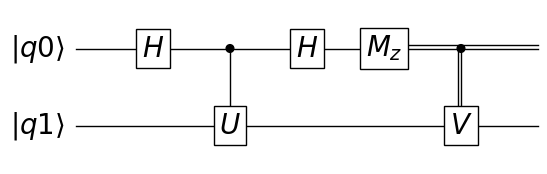

In [11]:
# Qasm
q = Qasm("def	c-U,1,'U'","def	c-V,1,'V'",
         "qubit	q0","qubit	q1",
         "H	q0","c-U	q0,q1","H	q0",
         "measure	q0","c-V	q0,q1")
q.plot()

## Example 8
Goal:

<img src="http://www.media.mit.edu/quanta/qasm2circ/test8.png" width="400" />

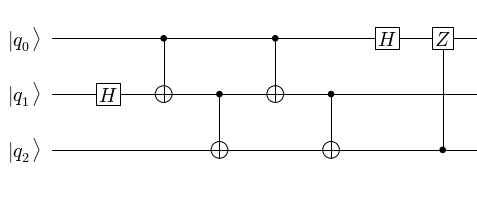

In [27]:
CircuitPlot(H(2)*H(2)*CGate(0,Z(2))*H(2)*CNOT(1,0)*CNOT(2,1)*CNOT(1,0)*CNOT(2,1)*H(1),3,labels=labeller(3))

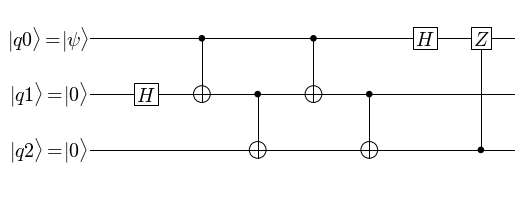

In [28]:
#Qasm:
q = Qasm("def	c-Z,1,'Z'",
         "qubit	q0,\psi","qubit	q1,0","qubit	q2,0",
         "H	q1","cnot	q0,q1","cnot	q1,q2","cnot	q0,q1","cnot	q1,q2",
         "H	q0","c-Z	q2,q0","H	q0","H	q0")
q.plot()

## Example 9
Goal:

<img src="http://www.media.mit.edu/quanta/qasm2circ/test9.png" width="300" />

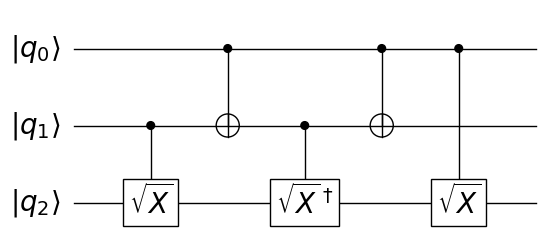

In [42]:
SqrtX = CreateOneQubitGate('sqrt-X','\sqrt{X}')
SqrtXdag = CreateOneQubitGate('sqrt-X-dag','\sqrt{X}^\dagger')

CircuitPlot(CGate(2,SqrtX(0))*CNOT(2,1)*CGate(1,SqrtXdag(0))*CNOT(2,1)*CGate(1,SqrtX(0)),3,labels=labeller(3))

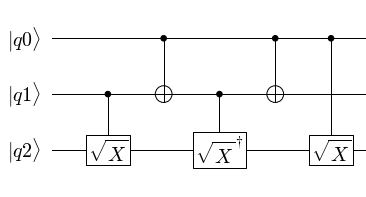

In [30]:
q = Qasm("def	c-X,1,'\sqrt{X}'","def	c-Xd,1,'{\sqrt{X}}^\dagger'",
         "qubit	q0","qubit	q1","qubit	q2",
         "c-X	q1,q2","cnot	q0,q1","c-Xd	q1,q2",
         "cnot	q0,q1","c-X	q0,q2")
q.plot()

## Example 10
Goal:

<img src="http://www.media.mit.edu/quanta/qasm2circ/test10.png" width="300" />

## Example 11
Goal:

<img src="http://www.media.mit.edu/quanta/qasm2circ/test11.png" width="300" />

## Example 12
Goal:

<img src="http://www.media.mit.edu/quanta/qasm2circ/test12.png" width="300" />

## Example 13
Goal:

<img src="http://www.media.mit.edu/quanta/qasm2circ/test13.png" width="300" />

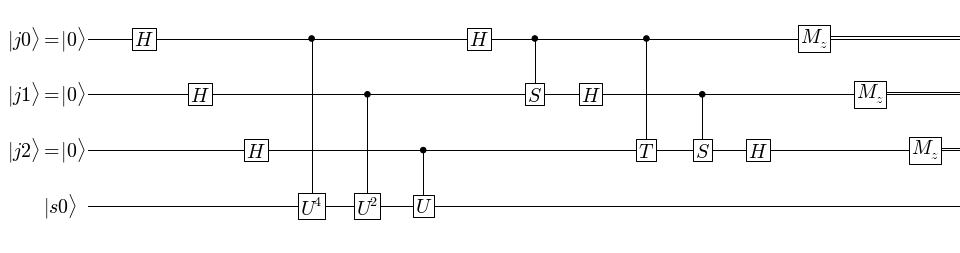

In [40]:
# Only works if you convert the defboxes to defs and remove qubit s2:
qasm_lines = """\
	def	CU,1,'U'
	def	CU2,1,'U^2'
	def	CU4,1,'U^4'
	def	c-S,1,'S'
	def	c-T,1,'T'

	qubit	j0,0	# QFT qubits
	qubit	j1,0
	qubit	j2,0
	qubit	s0	# U qubits

	h	j0	# equal superposition
	h	j1
	h	j2

	CU4	j0,s0	# controlled-U
	CU2	j1,s0
	CU	j2,s0

	h	j0	# QFT
	c-S	j0,j1
	h	j1
	nop	j0
	c-T	j0,j2
	c-S	j1,j2
	h	j2
	nop	j0
	nop	j0
	nop	j1
	
	measure	j0	# final measurement
	measure	j1	
	measure	j2"""

q = Qasm(*qasm_lines.splitlines())
q.plot()

## Example 14
Goal:

<img src="http://www.media.mit.edu/quanta/qasm2circ/test14.png" width="300" />

## Example 15
Goal:

<img src="http://www.media.mit.edu/quanta/qasm2circ/test15.png" width="300" />

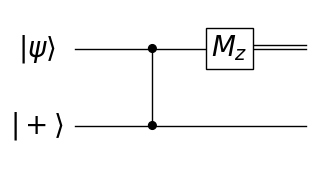

In [41]:
CircuitPlot(Mz(1)*CPHASE(0,1),2,labels=['+','\psi'])

## Example 16
Goal:

<img src="http://www.media.mit.edu/quanta/qasm2circ/test16.png" width="300" />

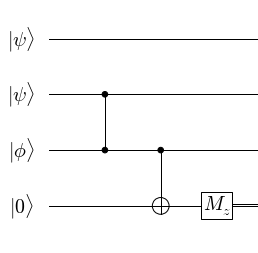

In [32]:
CircuitPlot(Mz(0)*CNOT(1,0)*CPHASE(1,2),4,labels=['0','\phi','\psi','\psi'])

## Example 17
Goal:

<img src="http://www.media.mit.edu/quanta/qasm2circ/test17.png" width="300" />

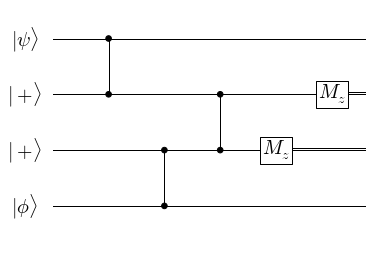

In [33]:
CircuitPlot(Mz(2)*Mz(1)*CPHASE(1,2)*CPHASE(1,0)*CPHASE(3,2),4,labels=['\phi','+','+','\psi'])

# Surface code 
These are the X and Z checks from a surface code:

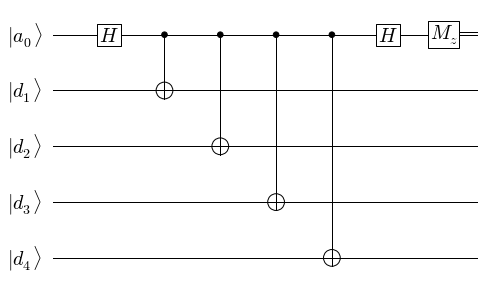

In [34]:
CircuitPlot(Mz(4)*H(4)*CNOT(4,0)*CNOT(4,1)*CNOT(4,2)*CNOT(4,3)*H(4),5,labels=['d_4','d_3','d_2','d_1','a_0'])

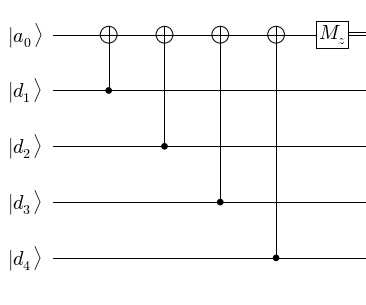

In [35]:
CircuitPlot(Mz(4)*CNOT(0,4)*CNOT(1,4)*CNOT(2,4)*CNOT(3,4),5,labels=['d_4','d_3','d_2','d_1','a_0'])

# Steane code

Make $|\bar{0}\rangle$, Fig 12 from [Aliferis, Gottesman, and Preskill](http://arxiv.org/pdf/quant-ph/0504218.pdf).

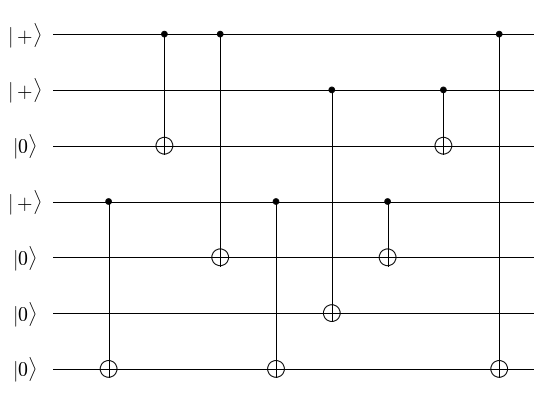

In [36]:
CircuitPlot(CNOT(6,0)*CNOT(5,4)*CNOT(3,2)*CNOT(5,1)*CNOT(3,0)*CNOT(6,2)*CNOT(6,4)*CNOT(3,0),
    7,labels=["0","0","0","+","0","+","+"])

Let's use the power of python to make this a little easier:

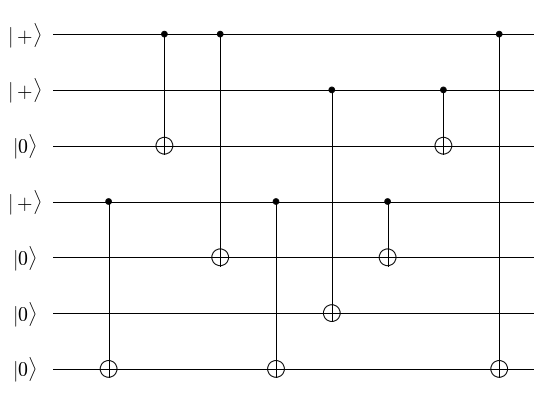

In [37]:
import operator
def prod(c): return reduce(operator.mul, c, 1)

steane_pairs = [(6,0),(5,4),(3,2),(5,1),(3,0),(6,2),(6,4),(3,0)]
circuit2 = prod([CNOT(i,j) for i,j in steane_pairs])
labels=["0","0","0","+","0","+","+"]
CircuitPlot(circuit2,7,labels=labels)

We can now extend this to a full Steane check:

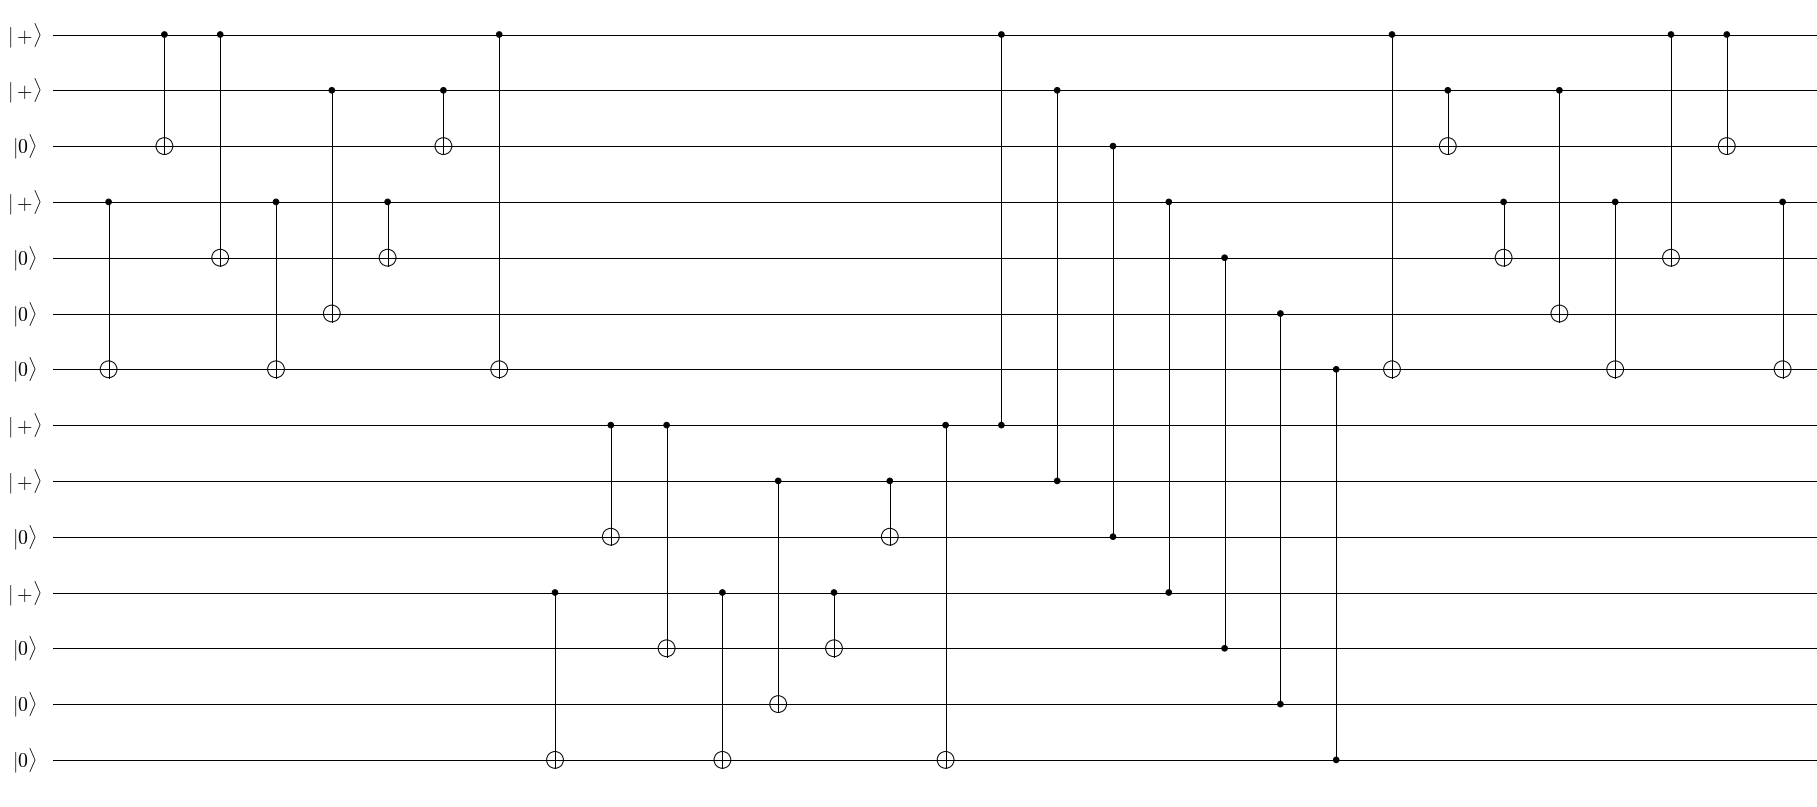

In [38]:
circuit1 = prod([CNOT(i+7,j+7) for i,j in steane_pairs])
decoder = prod([CNOT(i+7,j+7) for i,j in reversed(steane_pairs)])
transverse = prod([CPHASE(i+7,i) for i in range(7)])
CircuitPlot(decoder*transverse*circuit2*circuit1,14,labels=labels+labels)

That's only 7 real lines of code to plot the encoding.